# Create supersite locations list
## create list of all potential supersite venues
- Standardize supersite venue names (e.g. "Boulder HS")
- Standardize supersite columns
    - venue (standard name of site, e.g. "Boulder HS")
    - ssid (unique code for venue)
    - address
    - organization (name of organization that owns venue)
    - geometry (geopandas geometry column, e.g. Point (-105.345678,40.123456))
    - lat (latitude)
    - lon (longitude)
- Combine lists of known supersites
    - 2024 supersites
    - 2024 alternate supersites
    - 2020 supersites
- Save Supersite list to file or database
    - supersite_venues.geojson
    - supersite_venues.xlsx

## Create 2024 Supersite locations file
- Read Judi's file: data/2024_Supersite_list w Chairs & Cochairs.xlsx
- Add geolocations for each Supersite
- Write supersite locations geojson for map

In [17]:
import numpy as np
import pandas as pd
import geopandas as gpd

import supersites as ss

## create list of all potential supersites
- Standardize supersite names
- Standardize supersite columns
- Combine lists of known supersites
    - 2024 supersites
    - 2024 alternate supersites
    - 2020 supersites


In [18]:
# get list of 2024 supersites: ss_short_2024.geojson
ss2024 = gpd.read_file('data/ss_short_2024.geojson', driver='GEOJSON')

# get list of other potential supersites ss_short_2024_alternate.geojson
ssalt = gpd.read_file('data/ss_short_2024_alternate.geojson', driver='GEOJSON')

# combine all rows in ss2024 and ssalt
ssall = pd.concat([ss2024, ssalt]).sort_values('Venue').reset_index(drop=True)

# add lat and lon columns to ssall
ssall[['lat', 'lon']] = np.NaN

ssall.info()
ssall


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Venue     27 non-null     object  
 1   geometry  27 non-null     geometry
 2   lat       0 non-null      float64 
 3   lon       0 non-null      float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 992.0+ bytes


,Venue,geometry,lat,lon
0,Allenspark Fire Station,POINT (-105.52791 40.19713),NaN,NaN
1,Altona MS,POINT (-105.16262 40.14448),NaN,NaN
2,Angevine MS,POINT (-105.10336 39.98956),NaN,NaN
3,Boulder HS,POINT (-105.27287 40.01412),NaN,NaN
4,Burlington ES,POINT (-105.09455 40.15677),NaN,NaN
5,Casey MS,POINT (-105.27916 40.02287),NaN,NaN
6,Centaurus HS,POINT (-105.11253 39.98636),NaN,NaN
7,Centennial MS,POINT (-105.26715 40.04507),NaN,NaN
8,Eldorado K-8,POINT (-105.16118 39.92174),NaN,NaN
9,Eldorado Sp. Fire House,POINT (-105.24931 39.94266),NaN,NaN


In [19]:
ssall.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Compare ssall to supersites in 2024 supersite lists
- Read Judi's supersite spreadsheet
- Merge locations from ssall
- check for missing supersites
- create file of missing supersites
- add lat and lon columns for missing supersites
- create GeoDataFrame of missing supersites
- append missing supersites to ssall 

In [20]:
# Read Judi's supersite file

supersite_input = 'data/2024_Supersite_list w Chairs & Cochairs.xlsx' # 1/13/2024
sheetname ='Recap SS & Precinct #s'

supersites = (ss.read_supersite_pct(supersite_input, sheetname)
              .assign(supersite=lambda df: df['supersite'].str.strip() )
)
supersites.info()
supersites

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   supersite          20 non-null     object
 1   dems               20 non-null     int64 
 2   attendee_forecast  20 non-null     int64 
 3   total_precincts    20 non-null     int64 
 4   pctlist            20 non-null     object
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes


,supersite,dems,attendee_forecast,total_precincts,pctlist
0,Allenspark Fire Station,155,4,1,[914]
1,Altona MS,7518,188,14,"[605, 606, 607, 608, 609, 610, 611, 614, 615, ..."
2,Boulder HS,7241,181,10,"[810, 817, 818, 820, 821, 828, 829, 831, 832, ..."
3,Burlington Elementary,3351,84,7,"[600, 601, 602, 603, 604, 612, 613]"
4,Casey MS,4696,117,7,"[822, 823, 824, 825, 826, 827, 910]"
5,Centaurus HS,11327,283,20,"[300, 301, 302, 303, 304, 305, 306, 307, 308, ..."
6,Centennial MS,8884,222,13,"[803, 804, 805, 806, 807, 811, 812, 813, 814, ..."
7,Eldorado K8,3303,83,8,"[003, 100, 101, 102, 103, 104, 105, 106]"
8,Erie MS,3936,98,9,"[400, 401, 402, 403, 404, 405, 406, 407, 408]"
9,Gold Hill School,308,8,1,[909]


## add locations for each 2024 supersite
- add supersite location geometry column to supersites

In [21]:
# merge supersites DataFrame with ssall GeoDataFrame

ss_locations = pd.merge(supersites, ssall, left_on='supersite', right_on='Venue', how='left')
ss_locations.info()
ss_locations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   supersite          20 non-null     object  
 1   dems               20 non-null     int64   
 2   attendee_forecast  20 non-null     int64   
 3   total_precincts    20 non-null     int64   
 4   pctlist            20 non-null     object  
 5   Venue              13 non-null     object  
 6   geometry           13 non-null     geometry
 7   lat                0 non-null      float64 
 8   lon                0 non-null      float64 
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 1.5+ KB


,supersite,dems,attendee_forecast,total_precincts,pctlist,Venue,geometry,lat,lon
0,Allenspark Fire Station,155,4,1,[914],Allenspark Fire Station,POINT (-105.52791 40.19713),NaN,NaN
1,Altona MS,7518,188,14,"[605, 606, 607, 608, 609, 610, 611, 614, 615, ...",Altona MS,POINT (-105.16262 40.14448),NaN,NaN
2,Boulder HS,7241,181,10,"[810, 817, 818, 820, 821, 828, 829, 831, 832, ...",Boulder HS,POINT (-105.27287 40.01412),NaN,NaN
3,Burlington Elementary,3351,84,7,"[600, 601, 602, 603, 604, 612, 613]",NaN,None,NaN,NaN
4,Casey MS,4696,117,7,"[822, 823, 824, 825, 826, 827, 910]",Casey MS,POINT (-105.27916 40.02287),NaN,NaN
5,Centaurus HS,11327,283,20,"[300, 301, 302, 303, 304, 305, 306, 307, 308, ...",Centaurus HS,POINT (-105.11253 39.98636),NaN,NaN
6,Centennial MS,8884,222,13,"[803, 804, 805, 806, 807, 811, 812, 813, 814, ...",Centennial MS,POINT (-105.26715 40.04507),NaN,NaN
7,Eldorado K8,3303,83,8,"[003, 100, 101, 102, 103, 104, 105, 106]",NaN,None,NaN,NaN
8,Erie MS,3936,98,9,"[400, 401, 402, 403, 404, 405, 406, 407, 408]",Erie MS,POINT (-105.05297 40.05102),NaN,NaN
9,Gold Hill School,308,8,1,[909],NaN,None,NaN,NaN


In [22]:
# write ss_locations to excel file to add geolocations for missing venues
ss_locations.to_excel('data/ss_locations.xlsx')

## add missing supersite geometries


In [23]:
# get geometry for 2024 Supersites that are missing in ssall
ssmissing = pd.read_excel('data/ss_locations_missing.xlsx', sheet_name='missingVenues', skiprows=0,  ).dropna()


ssmissing.info()
ssmissing


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column1            7 non-null      float64
 1   supersite          7 non-null      object 
 2   dems               7 non-null      float64
 3   attendee_forecast  7 non-null      float64
 4   total_precincts    7 non-null      float64
 5   pctlist            7 non-null      object 
 6   Venue              7 non-null      object 
 7   lat                7 non-null      float64
 8   lon                7 non-null      float64
dtypes: float64(6), object(3)
memory usage: 560.0+ bytes


,Column1,supersite,dems,attendee_forecast,total_precincts,pctlist,Venue,lat,lon
0,3.0,Burlington Elementary,3351.0,84.0,7.0,"['600', '601', '602', '603', '604', '612', '613']",Burlington Elementary,40.146654,-105.108633
1,7.0,Eldorado K8,3303.0,83.0,8.0,"['003', '100', '101', '102', '103', '104', '10...",Eldorado K8,39.921698,-105.161197
2,9.0,Gold Hill School,308.0,8.0,1.0,['909'],Gold Hill School,40.063366,-105.412473
3,10.0,Jamestown School,283.0,7.0,1.0,['913'],Jamestown School,40.116432,-105.387802
4,12.0,Lyons Middle Senior,2380.0,60.0,5.0,"['700', '701', '702', '915', '916']",Lyons Middle Senior,40.214760,-105.264461
5,14.0,Monarch HS,7185.0,180.0,13.0,"['200', '201', '202', '203', '204', '205', '20...",Monarch HS,39.952022,-105.141777
6,19.0,Ward Private Home,168.0,4.0,1.0,['908'],Ward Private Home,40.073398,-105.506519


In [24]:
ssmissinggdf = gpd.GeoDataFrame(ssmissing, geometry=gpd.points_from_xy(ssmissing['lon'], ssmissing['lat']), crs='EPSG:4326' )

ssmissinggdf.info()
ssmissinggdf


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Column1            7 non-null      float64 
 1   supersite          7 non-null      object  
 2   dems               7 non-null      float64 
 3   attendee_forecast  7 non-null      float64 
 4   total_precincts    7 non-null      float64 
 5   pctlist            7 non-null      object  
 6   Venue              7 non-null      object  
 7   lat                7 non-null      float64 
 8   lon                7 non-null      float64 
 9   geometry           7 non-null      geometry
dtypes: float64(6), geometry(1), object(3)
memory usage: 616.0+ bytes


,Column1,supersite,dems,attendee_forecast,total_precincts,pctlist,Venue,lat,lon,geometry
0,3.0,Burlington Elementary,3351.0,84.0,7.0,"['600', '601', '602', '603', '604', '612', '613']",Burlington Elementary,40.146654,-105.108633,POINT (-105.10863 40.14665)
1,7.0,Eldorado K8,3303.0,83.0,8.0,"['003', '100', '101', '102', '103', '104', '10...",Eldorado K8,39.921698,-105.161197,POINT (-105.16120 39.92170)
2,9.0,Gold Hill School,308.0,8.0,1.0,['909'],Gold Hill School,40.063366,-105.412473,POINT (-105.41247 40.06337)
3,10.0,Jamestown School,283.0,7.0,1.0,['913'],Jamestown School,40.116432,-105.387802,POINT (-105.38780 40.11643)
4,12.0,Lyons Middle Senior,2380.0,60.0,5.0,"['700', '701', '702', '915', '916']",Lyons Middle Senior,40.214760,-105.264461,POINT (-105.26446 40.21476)
5,14.0,Monarch HS,7185.0,180.0,13.0,"['200', '201', '202', '203', '204', '205', '20...",Monarch HS,39.952022,-105.141777,POINT (-105.14178 39.95202)
6,19.0,Ward Private Home,168.0,4.0,1.0,['908'],Ward Private Home,40.073398,-105.506519,POINT (-105.50652 40.07340)


<Axes: >

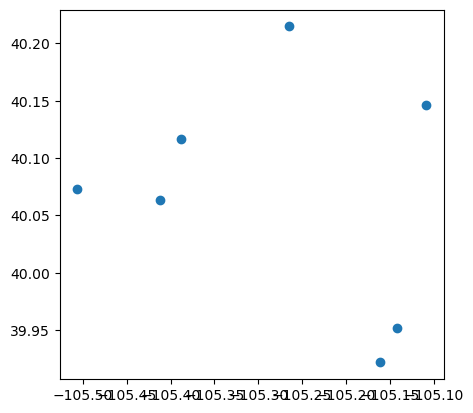

In [25]:
ssmissinggdf.plot()

In [26]:
# add new supersites to ssall

dropcols = ['Column1', 'supersite', 'dems',
       'attendee_forecast', 'total_precincts', 'pctlist']

ssall = pd.concat([ssall, ssmissinggdf]).drop(columns=dropcols).sort_values('Venue').reset_index(drop=True)

ssall.info()
ssall
# POINT(-105.10862252002309 40.1466293875446 )

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Venue     34 non-null     object  
 1   geometry  34 non-null     geometry
 2   lat       7 non-null      float64 
 3   lon       7 non-null      float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.2+ KB


,Venue,geometry,lat,lon
0,Allenspark Fire Station,POINT (-105.52791 40.19713),NaN,NaN
1,Altona MS,POINT (-105.16262 40.14448),NaN,NaN
2,Angevine MS,POINT (-105.10336 39.98956),NaN,NaN
3,Boulder HS,POINT (-105.27287 40.01412),NaN,NaN
4,Burlington ES,POINT (-105.09455 40.15677),NaN,NaN
5,Burlington Elementary,POINT (-105.10863 40.14665),40.146654,-105.108633
6,Casey MS,POINT (-105.27916 40.02287),NaN,NaN
7,Centaurus HS,POINT (-105.11253 39.98636),NaN,NaN
8,Centennial MS,POINT (-105.26715 40.04507),NaN,NaN
9,Eldorado K-8,POINT (-105.16118 39.92174),NaN,NaN


In [27]:
# add missing lat and long to ssall
ssall = ssall.assign(
    lon=ssall['geometry'].x,
    lat=ssall['geometry'].y
)

ssall

,Venue,geometry,lat,lon
0,Allenspark Fire Station,POINT (-105.52791 40.19713),40.197128,-105.527914
1,Altona MS,POINT (-105.16262 40.14448),40.144483,-105.162618
2,Angevine MS,POINT (-105.10336 39.98956),39.989559,-105.103357
3,Boulder HS,POINT (-105.27287 40.01412),40.014116,-105.272871
4,Burlington ES,POINT (-105.09455 40.15677),40.156767,-105.094555
5,Burlington Elementary,POINT (-105.10863 40.14665),40.146654,-105.108633
6,Casey MS,POINT (-105.27916 40.02287),40.022871,-105.279158
7,Centaurus HS,POINT (-105.11253 39.98636),39.986360,-105.112528
8,Centennial MS,POINT (-105.26715 40.04507),40.045068,-105.267147
9,Eldorado K-8,POINT (-105.16118 39.92174),39.921739,-105.161176


In [28]:
ssallgdf = gpd.GeoDataFrame(ssall, geometry='geometry', crs='EPSG:4326')

ssallgdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Venue     34 non-null     object  
 1   geometry  34 non-null     geometry
 2   lat       34 non-null     float64 
 3   lon       34 non-null     float64 
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.2+ KB


<Axes: >

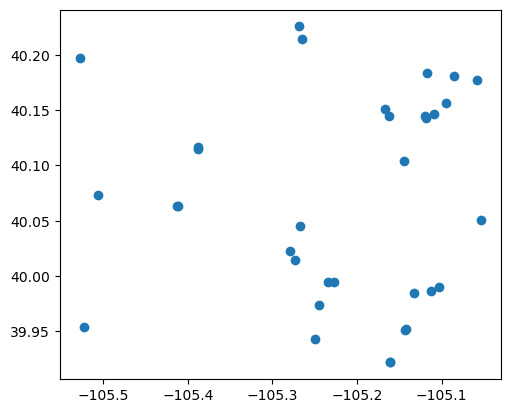

In [29]:
ssallgdf.plot()

In [32]:

ssallgdf.to_file('data/supersite_venues.geojson', driver='GeoJSON', index=False)

ssallgdf.to_excel('data/supsite_venues.xlsx')
